#### Unindo Dataframes


In [0]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2']) # Criando um Dataframe com o pandas. Ao final é passada a lista de indices para cada registro

In [0]:
df

In [0]:
df['Date'] = ['December 1', 'January 1', 'mid-way'] # Add uma nova coluna ao Dataframe
df

In [0]:
df['Delivered'] = True # Quando é passado um único valor, ele é replicado a todas as linhas
df

In [0]:
df['Feedback'] = ['Positive', None, 'Negative'] # Adicionando um valor diferente para cada linha. 
                                                # Para tal, é necessária uma lista tão grande quanto o dataframe.                                       
df

In [0]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-way'}) # Se cada linha tem um índice único, é possível especificar
                                                         # qual linha deve receber o valor, todas as não especificadas serão preenchidas pelo pandas. 
adf

In [0]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

In [0]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True) # Juntando 2 dataframes com um outer join através do merge

In [0]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True) # Juntando 2 dataframes com um inner join através do merge

In [0]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True) # Juntando 2 dataframes com um left join através do merge

In [0]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True) # Juntando 2 dataframes com um right join através do merge

In [0]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [0]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [0]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='outer', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

#### Idioma Pandas

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
df = pd.read_csv('/content/drive/My Drive/census.csv')
df

In [0]:
# Encadeamento de Métodos (Pandorable)
(df.where(df['SUMLEV']==50)
   .dropna()
   .set_index(['STNAME', 'CTYNAME'])
   .rename(columns={'ESTIMATEBASE2010':'Estimates Base 2010'}))

In [0]:
# Sem Encadeamento de Métodos (Not Pandorable haha)
df = df[df['SUMLEV'] == 50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010':'Estimates Base 2010'})

In [0]:
import numpy as np

def min_max(row):
  data = row[['POPESTIMATE2010',
              'POPESTIMATE2011',
              'POPESTIMATE2012',
              'POPESTIMATE2013',
              'POPESTIMATE2014',
              'POPESTIMATE2015']]
  return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [0]:
# Exemplo da função apply
df.apply(min_max, axis=1)

In [0]:
def min_max(row):
  data = row[['POPESTIMATE2010',
              'POPESTIMATE2011',
              'POPESTIMATE2012',
              'POPESTIMATE2013',
              'POPESTIMATE2014',
              'POPESTIMATE2015']]
  row['max'] = np.max(data)
  row['min'] = np.min(data)
  return row

df.apply(min_max, axis=1)

In [0]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']

df.apply(lambda x: np.max(x[rows]), axis=1)

#### Group by

In [0]:
df = pd.read_csv('/content/drive/My Drive/census.csv')
df = df[df['SUMLEV']==50]
df

In [0]:
%%timeit -n 10
for state in df['STNAME'].unique():
  avg = np.average(df.where(df['STNAME'] == state).dropna()['CENSUS2010POP'])
  print('Countries in state ' + state + ' have an average population of ' + str(avg))

In [0]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
  avg = np.average(frame['CENSUS2010POP'])
  print('Countries in state ' + group + ' have an average population of ' + str(avg))

In [0]:
df = df.set_index('STNAME')

def fun(item):
  if item[0] < 'M':
    return 0
  if item[0] < 'Q':
    return 1
  return 2

for group, frame in df.groupby(fun):
  print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

In [0]:
df = pd.read_csv('/content/drive/My Drive/census.csv')
df = df[df['SUMLEV']==50]

In [0]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

In [0]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

In [0]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average, 'sum': np.sum}))

In [0]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011'].agg({'avg': np.average, 'sum': np.sum}))

In [0]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011'].agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

#### Scales

In [0]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

In [0]:
df['Grades'].astype('category').head()

In [0]:
grades = df['Grades'].astype(pd.api.types.CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], ordered=True))#,
                             #)
grades.head()

In [0]:
grades > 'C'

In [0]:
df = pd.read_csv('/content/drive/My Drive/census.csv')
df = df[df['SUMLEV']==50]
df = (df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average, 'sum': np.sum}))
pd.cut(df['avg'], 10)

#### Tabelas Dinâmicas

In [0]:
df = pd.read_csv('/content/drive/My Drive/cars.csv')
df

In [0]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

In [0]:
print(pd.pivot_table(df, index=['(kW)','YEAR']))

In [0]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean, np.min], margins=True)

#### Datas

In [71]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

In [72]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [73]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

In [74]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [75]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [76]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,23,83
"Aug 29, 2014",20,41
2015-06-26,22,52
7/12/16,49,10


In [78]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

In [79]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [80]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

In [81]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [82]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,102,115
2016-10-16,110,122
2016-10-30,114,121
2016-11-13,116,126
2016-11-27,122,118
2016-12-11,118,124
2016-12-25,115,122
2017-01-08,111,115
2017-01-22,111,125


In [83]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [84]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,8.0,7.0
2016-10-30,4.0,-1.0
2016-11-13,2.0,5.0
2016-11-27,6.0,-8.0
2016-12-11,-4.0,6.0
2016-12-25,-3.0,-2.0
2017-01-08,-4.0,-7.0
2017-01-22,0.0,10.0


In [85]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,108.666667,119.333333
2016-11-30,119.000000,122.000000
2016-12-31,116.500000,123.000000
2017-01-31,111.000000,120.000000


In [86]:
df['2017']

,Count 1,Count 2
2017-01-08,111,115
2017-01-22,111,125


In [87]:
df['2016-12']

,Count 1,Count 2
2016-12-11,118,124
2016-12-25,115,122


In [88]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,118,124
2016-12-25,115,122
2017-01-08,111,115
2017-01-22,111,125


In [89]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,102,115
2016-10-09,102,115
2016-10-16,110,122
2016-10-23,110,122
2016-10-30,114,121
2016-11-06,114,121
2016-11-13,116,126
2016-11-20,116,126
2016-11-27,122,118
2016-12-04,122,118


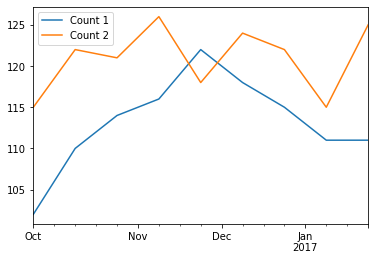

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()